In [24]:
# import libraries
import random

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

**ONION DECOMPOSITION FUNCTIONS**

- class Node:
    - attributes: num (name of node), coreness (core number of node), and layerness (onion layer number of node)
    
- class Edge:
    - attributes: src and dest (the two nodes the edge is between)

- getCurrLayer(G, core)
    - input: G, a networkx graph. core, an integer indicating the current core number
    - output: currLayer, a list of Node objects such that each Node object has a degree equal to or less than the core number
    

- updateCoreNumber(G, core):
    - input: G, a networkx graph. core, an integer indicating the current core number
    - output: core, an integer indicating the updated new core number
    
- onionDecomp(G)
    - input: g, a networkx graph
    - output: onionDecomposition, a list of Node objects

In [25]:
# define a node object to store core and layer numbers
class Node:
    def __init__(self, num, coreness, layerness):
        self.num = num
        self.coreness = coreness
        self.layerness = layerness
        
class Edge:
    def __init__(self, src, dest, weight):
        self.src = src
        self.dest = dest
        self.weight = weight

        
        
# returns all nodes of degree = core
def getCurrLayer(G, core):
    currLayer = []
    for i in G.nodes:
        deg = G.degree[i]
        if(deg <= core):
            currLayer.append(Node(i, 0, 0))
    return currLayer
        

# returns updated core number
def updateCoreNumber(G, core):
    D = []
    for v in G.nodes:
        D.append(G.degree[v])
    tmp = core + 1
    if(D != []):
        if (min(D) >= tmp):
            core = min(D)
    return core

                
def onionDecomp(G):
    # copy G
    G = G.copy()
    
    # initialize core = 1 and layer = 1
    core = 1
    layer = 1
    onionDecomposition = []
    
    # while-loop until every node has been removed
    while G.nodes():
        
        # currLayer is a list containing all nodes of degree = current core number
        currLayer = getCurrLayer(G, core)
        
        # iterate through currLayer. Remove the node from the graph ("peeling").
        # assign a core number and layer number to each node
        for v in currLayer:
            G.remove_node(v.num)
            v.coreness = core
            v.layerness = layer
            onionDecomposition.append(v)
            
        # update the layer number -- note that this ALWAYS updates
        layer += 1
        
        # update the core number -- this is NOT updated in every single iteration
        core = updateCoreNumber(G, core)
                
    # return the onion decomposition - every node is assigned a core number and a layer number
    return onionDecomposition

**DISPLAY FUNCTIONS**

- initGraph(n)
    - input: n, an integer
    - output: G, a graph of size n


- displayGraph(G)
    - input: G, a networkx graph
    - output: none, simply displays the graph
    
    
- printOnionDecomp(onionDecomposition)
    - input: onionDecomposition, a list of Node objects
    - output: none, simply prints the node number, layer number, and core number of each Node object

- doAll()
    - input: none
    - algorithm: calls initGraph(n) to initialize a graph, then calls displayGraph(G) to display the graph, then uses onionDecomp(G) to compute the onion decomposition of the graph, then calls printOnionDecomp(onionDecomposition) to print the onion decomposition of the graph
    - output: none

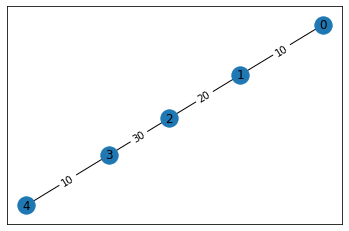

Onion Decomposition:
Node: 0 , Core: 1 , Layer: 1
Node: 1 , Core: 1 , Layer: 2
Node: 2 , Core: 1 , Layer: 3
Node: 3 , Core: 1 , Layer: 2
Node: 4 , Core: 1 , Layer: 1


In [26]:
# initialize graph of size n
def initGraph(n):
    G = nx.OrderedGraph()
    V = [i for i in range(0, n)]
    E = [(0, 1, 10), (1, 2, 20), (2, 3, 30), (3, 4, 10)]
    G.add_nodes_from(V)
    G.add_weighted_edges_from(E)
    return G

# display graph
def displayGraph(G):
    pos=nx.spring_layout(G)
    nx.draw_networkx(G,pos)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    plt.show()
    
# sorts the onion decomposition by nodes
# prints everything out
def printOnionDecomp(onionDecomposition):
    onionDecomposition.sort(key=lambda x: x.num, reverse=False)
    print("Onion Decomposition:")
    for d in onionDecomposition:
        print("Node:", d.num, ", Core:", d.coreness, ", Layer:", d.layerness)

def doAll():
    
    # initialize a graph of size n
    n = 5
    G = initGraph(n)
    
    # display the graph
    displayGraph(G)
    
    # compute the onion decomposition of the graph
    onionDecomposition = onionDecomp(G)
    
    # compute the weighted onion decomposition of the graph
    
    # print the onion decomposition of the graph
    printOnionDecomp(onionDecomposition)

doAll()

**WEIGHTED ONION DECOMPOSITION**

- class NodeW
    - attributes: num (name of node), adjustedCore (core number of node, adjusted for the purposes of the weighted onion decomposition algorithm), weightedLayer (weighted onion layer number of node)
    
- weightedOnionDecomposition(G)
    - input: G, a networkx graph
    - output: WOD, a list of NodeW objects, each one with the correct weighted onion layer number
    
- printWeightedOnionDecomp(WOD)
    - input: WOD, a list of NodeW objects, each one with the correct weighted onion layer number
    - output: prints weighted onion decomp

In [27]:
class NodeW:
    def __init__(self, num, adjustedCore):
        self.num = num
        self.adjustedCore = adjustedCore
        self.weightedLayer = 0

def weightedOnionDecomposition(G):
    ccomps = nx.algorithms.components.connected_components(G)
    WOD = []
    for ccomp in ccomps:
        WOD += weightedOnionDecomp_connected(G.subgraph(ccomp))
    return WOD
        
# 'G' - a graph consisting of node objects
def weightedOnionDecomp_connected(G):
    
    # 'OD' - the result from implementing onion decomposition on graph G
        # assigns a core number and a layer number to each node in G
    OD = onionDecomp(G)
    
    OD.sort(key=lambda node: node.layerness)
    
    maxLayer = OD[-1].layerness
    
    WOD = [NodeW(node.num, node.coreness if node.layerness != maxLayer else node.coreness+0.5) for node in OD]
    
    # 'weightedLayer' - the number that stores the current weighted layer number
    weightedLayer = 0
    
    # 'WODcores' - a list of all the k-cores that appear in 'G'
    WODcores = list(set(nodew.adjustedCore for nodew in WOD))
    WODcores.sort()
    
    maxACore = WODcores[-1]
    currCoreIndex = 0
    
    # continue iterating until we reach the highest core number
    while currCoreIndex < len(WODcores)-1:
        currCore = WODcores[currCoreIndex]
        currCoreIndex += 1
        
        # 'currNodes' - a list of all the nodes in the current core
        currNodes = [node for node in WOD if node.adjustedCore == currCore]
        
        # 'nextNodes' - a list of all the nodes in the next core
        nextNodes = [node for node in WOD if node.adjustedCore > currCore]
        
        # for each node in currNodes, find the shortest distance
            # between it and a node in the next core, and assign
            # it a temporary layer number
        sources = [node.num for node in nextNodes]
        dists = nx.algorithms.shortest_paths.weighted.multi_source_dijkstra_path_length(G, sources)
        for node in currNodes:
            node.weightedLayer = dists[node.num]
        
        # afterwards, find the smallest weightedLayer number and
            # make it zero, while adjusting all the other numbers
            # as well
        adjustment = max(node.weightedLayer for node in currNodes)
        
        # turn everything negative
        for node in currNodes:
            node.weightedLayer = - node.weightedLayer
            
        # make adjustment to turn every number positive
        for node in currNodes:
            node.weightedLayer += adjustment
            
        # add weighted layer number to everything, then adjust
            # said number
        for node in currNodes:
            node.weightedLayer += weightedLayer
        
        weightedLayer += adjustment
    
    # when there is no larger core number anymore, assign every node the current weightedLayer
    for node in WOD:
        if node.adjustedCore == maxACore:
            node.weightedLayer = weightedLayer
    return WOD

In [28]:
# sorts the onion decomposition by nodes
# prints everything out
def printWeightedOnionDecomp(WOD):
    WOD.sort(key=lambda x: x.num)
    print("Weighted Onion Decomposition:")
    for d in WOD:
        print("Node:", d.num, ", Adjusted Core:", d.adjustedCore, ", Weighted Layer:", d.weightedLayer)

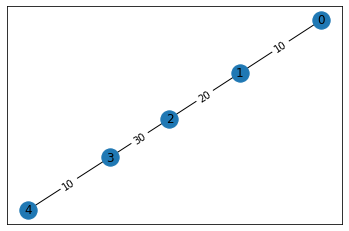

Weighted Onion Decomposition:
Node: 0 , Adjusted Core: 1 , Weighted Layer: 10
Node: 1 , Adjusted Core: 1 , Weighted Layer: 20
Node: 2 , Adjusted Core: 1.5 , Weighted Layer: 40
Node: 3 , Adjusted Core: 1 , Weighted Layer: 10
Node: 4 , Adjusted Core: 1 , Weighted Layer: 0


In [29]:
def doAllW():
    
    # initialize a graph of size n
    n = 5
    G = initGraph(n)
    
    # display the graph
    displayGraph(G)
    
    # compute the onion decomposition of the graph
    WOD = weightedOnionDecomposition(G)
    
    # compute the weighted onion decomposition of the graph
    
    # print the onion decomposition of the graph
    printWeightedOnionDecomp(WOD)

doAllW()

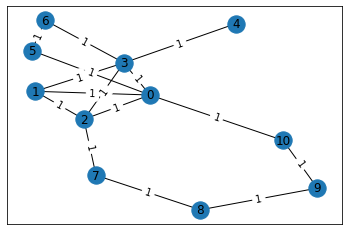

Weighted Onion Decomposition:
Node: 0 , Adjusted Core: 3.5 , Weighted Layer: 3
Node: 1 , Adjusted Core: 3.5 , Weighted Layer: 3
Node: 2 , Adjusted Core: 3.5 , Weighted Layer: 3
Node: 3 , Adjusted Core: 3.5 , Weighted Layer: 3
Node: 4 , Adjusted Core: 1 , Weighted Layer: 0
Node: 5 , Adjusted Core: 2 , Weighted Layer: 2
Node: 6 , Adjusted Core: 2 , Weighted Layer: 2
Node: 7 , Adjusted Core: 2 , Weighted Layer: 2
Node: 8 , Adjusted Core: 2 , Weighted Layer: 1
Node: 9 , Adjusted Core: 2 , Weighted Layer: 1
Node: 10 , Adjusted Core: 2 , Weighted Layer: 2


In [30]:
# models

def testWODOn(G):
    displayGraph(G)
    WOD = weightedOnionDecomposition(G)
    printWeightedOnionDecomp(WOD)

def initSpiderGraph(n_center, n_outsides, loopyLegs=False):
    G = nx.OrderedGraph()
    Vc = [i for i in range(n_center)]
    Ec = [(i,j,1) for i in range(n_center) for j in range(n_center) if i<j]
    G.add_nodes_from(Vc)
    G.add_weighted_edges_from(Ec)
    cur_node = n_center
    for no in n_outsides:
        path = [random.choice(Vc)] + [cur_node+i for i in range(no)]
        if loopyLegs: path.append(random.choice(Vc))
        cur_node += no
        for i in range(len(path)-1):
            G.add_weighted_edges_from([(path[i], path[i+1], 1)])
    return G

testWODOn(initSpiderGraph(4, [1,2,4], loopyLegs=True))

**APPLICATIONS: ROAD NETWORK**

- txtToGraph(edgesFile, nodesFile)
    - input: edgesFile, nodesFile are txt files containing info on the graph
    - output: G, a networkx graph
    
- isConnected(G)
    - input: G, a networkx graph
    - output: true if network is connected, false if network is not connected

In [39]:
# get num of lines in a file
def file_len(fname):
    for i, l in enumerate(fname):
        pass
    return i + 1

# convert text file into a networkx graph
def txtToGraph(edgesFile, nodesFile):
    
    # number of nodes in graph G is the number of lines in nodesFile
    n = file_len(nodesFile)
    G = nx.OrderedGraph()
    V = [i for i in range(0, n)]
    # edges
    E = []
    edgesFileLines = edgesFile.readlines()
    for line in edgesFileLines:
        line = line.split()
        s = line[0]
        d = line[1]
        w = line[2]
        E.append((s, d, float(w)))
    
    # return graph
    G.add_nodes_from(V)
    G.add_weighted_edges_from(E)
    return G

    
# create a list of files to run through
    # in a for-loop, run the weighted onion decomp algo on each file
    # record all the results
    # graph the results somehow? like a distribution of weighted layer numbers maybe
def doAllRoad():
    for i in range(1, 6):
        edgesFile = open("roadNetworks/roadNetworkEdges" + str(i) + ".txt", "r")
        nodesFile = open("roadNetworks/roadNetworkNodes" + str(i) + ".txt", "r")
        G = txtToGraph(edgesFile, nodesFile)
        edgesFile.close()
        nodesFile.close()
        WOD = weightedOnionDecomposition(G)

doAllRoad()